# Project 3: Exploratory Data Analysis of Post-Coma IQ Recovery
## SDS 348 Spring 2021

### Nikita Sidorchuk
#### nas3428

In [9]:
# Multiple outputs from single chunk in Jupyter Notebook
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [25]:
# Import packages and dataset
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

coma = pd.read_csv("Wong.csv")

#### Introduction:

In [61]:
coma.describe()
coma.sex.describe()

,patient,days,duration,age,piq,viq
count,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000
mean,166.000000,481.851964,14.296073,31.853190,87.555891,94.963746
std,95.695698,1137.083150,26.039887,13.867958,15.131516,14.053099
min,1.000000,13.000000,0.000000,6.513347,50.000000,64.000000
25%,83.500000,59.000000,1.000000,21.737165,77.000000,85.000000
50%,166.000000,150.000000,7.000000,26.877480,87.000000,94.000000
75%,248.500000,416.000000,16.000000,40.922660,97.000000,105.000000
max,331.000000,11628.000000,255.000000,80.032850,133.000000,132.000000


count      331
unique       2
top       Male
freq       260
Name: sex, dtype: object

This dataset is a study of the IQ of patients who have recovered from a comatose state. The 'days' variable measures how many days after the patient awoke from the coma the IQ tests were conducted, 'duration' measures the duration of the coma, while age 'piq' is the patients mathematical IQ score, and 'viq' is the patients verbal score. There were a total of 331 participants in the study, 260 of whom were male and 71 are female. The mean age of the patients was 31.85 years old. The mean PIQ was 87.55, while the mean VIQ was 94.96, which are both slightly lower than the average 100, that the IQ scale is centered at.

#### Visualizations:

<AxesSubplot:xlabel='viq', ylabel='piq'>

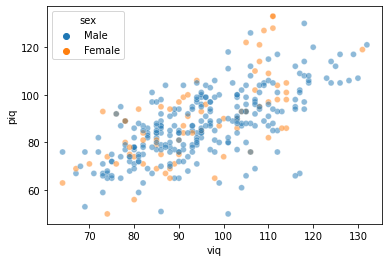

In [17]:
coma.pipe((sns.scatterplot, 'data'), \
      x = 'viq', y = 'piq', hue = 'sex', alpha = .5)

Making a scatterplot of the two IQ variables plotted against each other shows a strong, positive correlation between the two. Implying that a person with a high math IQ will likely also have a high verbal IQ. Then, coloring the plot by sex reveals that males and females are randomly distributed, meaning sex probably does not have a large impact in IQ in this study.

<AxesSubplot:xlabel='age', ylabel='viq'>

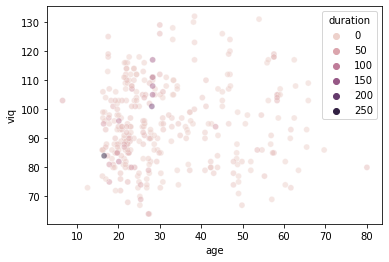

In [68]:
coma.pipe((sns.scatterplot, 'data'), \
    x = "age", y = "viq", hue = "duration", alpha = 0.5)

A scatterplot of age vs VIQ shows that most of the participants in the study are younger in age, with a high concentration around 20-30 years old. The VIQ is also randomly distributed across the plot, meaning VIQ and age are likely independent of each other. Finally, coloring the plot by 'duration' reveals a slightly darker hue toward the left of the plot, implying that younger people tend to be in comas longer.

<AxesSubplot:>

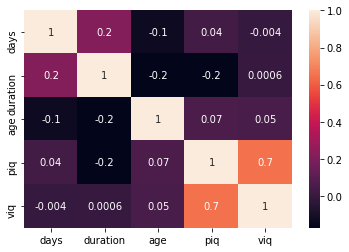

In [40]:
# Take out the 'patient' since it is a series
coma_p = coma.filter(["days", "duration", "age", "piq", "viq"]) 
# Create correlation matrix
corr_mat = coma_p.corr() 
sns.heatmap(corr_mat, annot = True, fmt='.1g')

Creating a correlation matrix heatmap shows that most of the variables are not very well correlated with each other, and tend to be centered around 0. The only variables that are signficantly correlated are VIQ and PIQ, which makes sense since both are divisions of IQ.